In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
Fraud_check = pd.read_csv('Fraud_check.csv')

In [4]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EXPLORATORY DATA ANALYSIS

In [5]:
Fraud_check.shape

(600, 6)

In [6]:
Fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
Fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
Fraud_check.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [10]:
#creat dummies for comp_data
Fraud_check = pd.get_dummies(Fraud_check, columns = ["Undergrad", "Marital.Status", "Urban"])

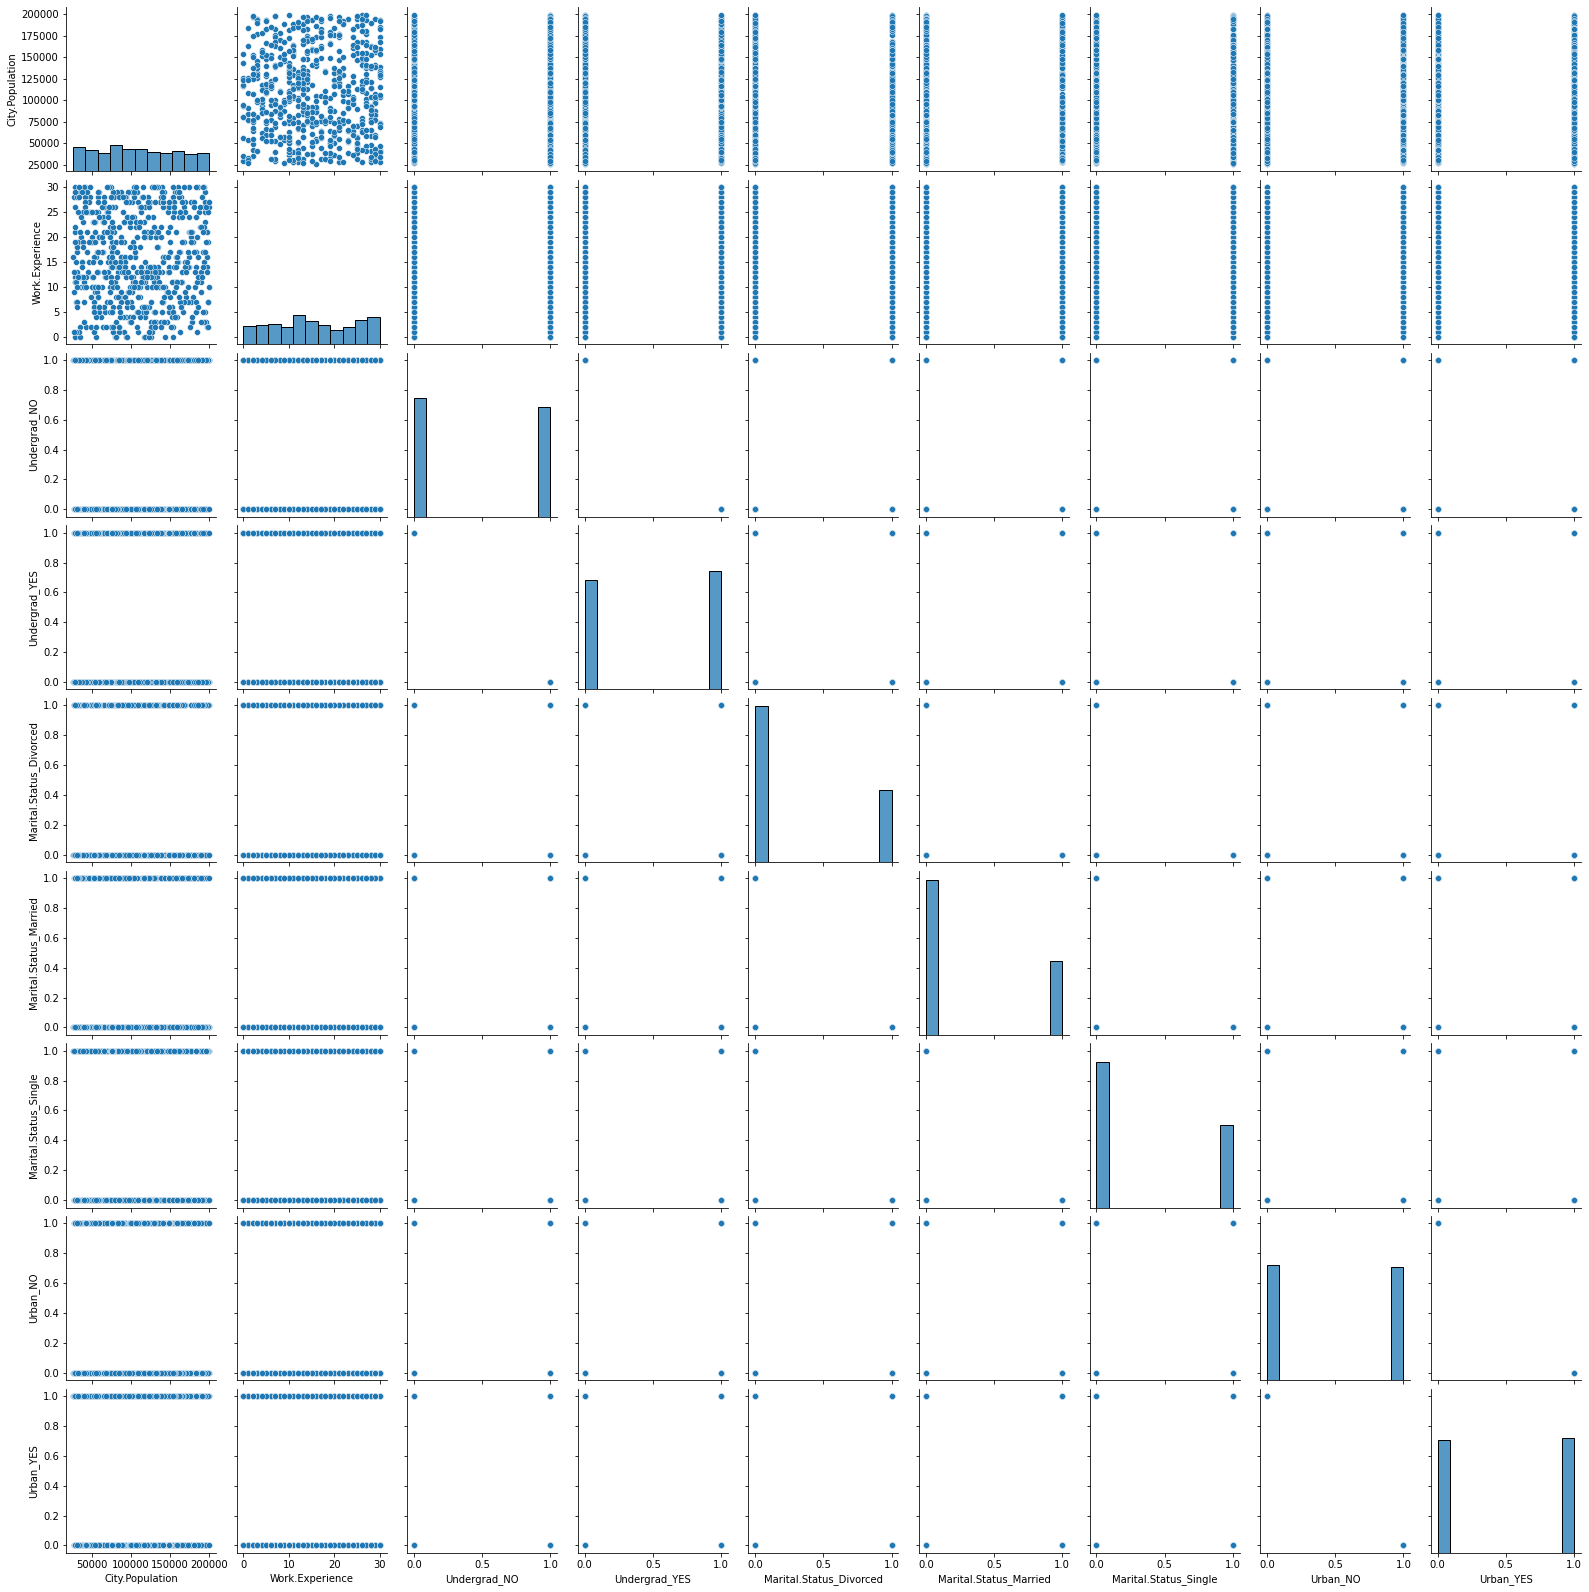

In [18]:
sns.pairplot(Fraud_check)

In [11]:
#converting continous type to categorical
max = Fraud_check['Taxable.Income'].max()
Fraud_check['Taxable.Income'] = pd.cut(Fraud_check['Taxable.Income'], bins = [-999 , 30000 , 99999] , labels=['Risky' , 'Good'])

In [12]:
Fraud_check['Taxable.Income'].unique()
Fraud_check['Taxable.Income'].value_counts()
colnames = list(Fraud_check.columns)

In [13]:
Fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [14]:
Fraud_check.isna().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

In [15]:
x = Fraud_check.iloc[:,1:]
y = Fraud_check.iloc[:,0]

In [16]:
#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## VISUALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


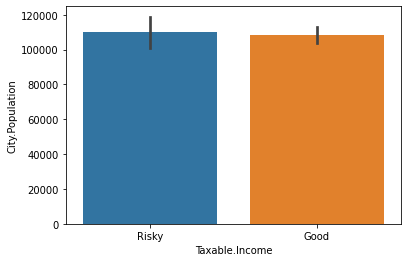

In [19]:
sns.barplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


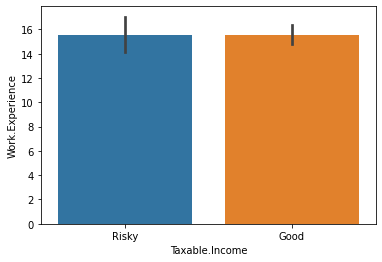

In [20]:
sns.barplot(Fraud_check['Taxable.Income'], Fraud_check['Work.Experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


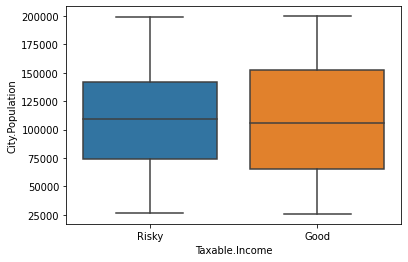

In [21]:
sns.boxplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


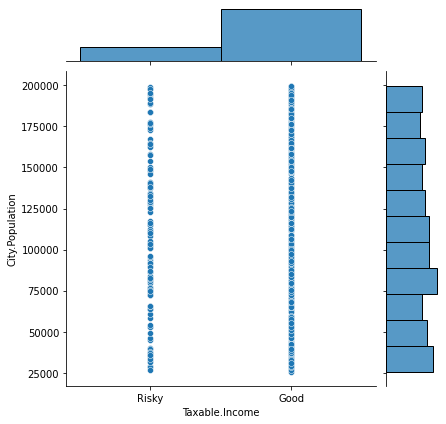

In [22]:
sns.jointplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


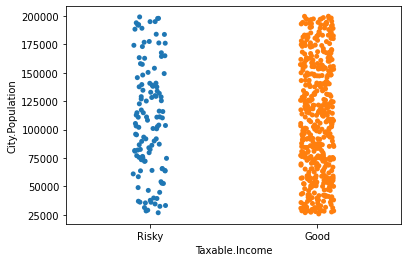

In [23]:
sns.stripplot(Fraud_check['Taxable.Income'], Fraud_check['City.Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


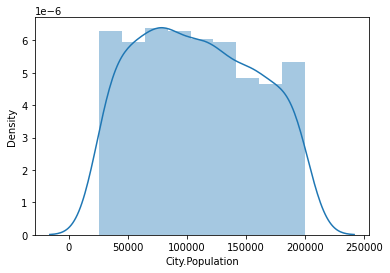

In [24]:
sns.distplot(Fraud_check['City.Population'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


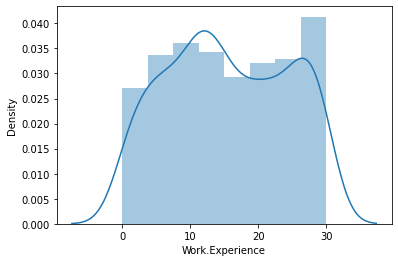

In [25]:
sns.distplot(Fraud_check['Work.Experience'])

## HYPERPARAMETER TUNNING

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [38]:
params = {
    'max_depth': [2,6,5,10,22],
    'min_samples_leaf': [3,5,10,15,20,50,100],
    'n_estimators': [10,20,30,50,100,200],
    'min_samples_split': [8, 10, 12,16]

}

In [39]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [40]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 840 candidates, totalling 3360 fits
CPU times: user 24.8 s, sys: 821 ms, total: 25.6 s
Wall time: 9min 5s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 6, 5, 10, 22],
                         'min_samples_leaf': [3, 5, 10, 15, 20, 50, 100],
                         'min_samples_split': [8, 10, 12, 16],
                         'n_estimators': [10, 20, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [41]:
grid_search.best_score_

0.7979166666666666

In [42]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=10, n_jobs=-1, random_state=42)

In [47]:
rf_best.feature_importances_

array([0.42593745, 0.33728679, 0.04083984, 0.02484126, 0.02993697,
       0.05198486, 0.01870132, 0.02939008, 0.04108144])

In [48]:
rf_best.feature_importances_

array([0.42593745, 0.33728679, 0.04083984, 0.02484126, 0.02993697,
       0.05198486, 0.01870132, 0.02939008, 0.04108144])

In [49]:
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rf_best.feature_importances_
})

In [50]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,City.Population,0.425937
1,Work.Experience,0.337287
5,Marital.Status_Married,0.051985
8,Urban_YES,0.041081
2,Undergrad_NO,0.040840
4,Marital.Status_Divorced,0.029937
7,Urban_NO,0.029390
3,Undergrad_YES,0.024841
6,Marital.Status_Single,0.018701


## RANDOM FOREST CLASSIFIER USING K-FOLD

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
num_trees = 10
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True) #Bootstrap

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.735


## ADABOOST CLASSIFIER

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


## RANDOM FOREST USING BEST HYPERPARAMETERS AND TRAIN-TEST SPLIT

In [55]:
model2 = RandomForestClassifier(criterion = 'entropy',random_state=42, n_jobs=-1, max_depth=10,
                                       n_estimators=10, oob_score=True)

In [56]:
%%time
model2.fit(x_train, y_train)

CPU times: user 52.4 ms, sys: 1.98 ms, total: 54.3 ms
Wall time: 123 ms


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=42)

In [57]:
# checking the oob score
model2.oob_score_

0.7291666666666666

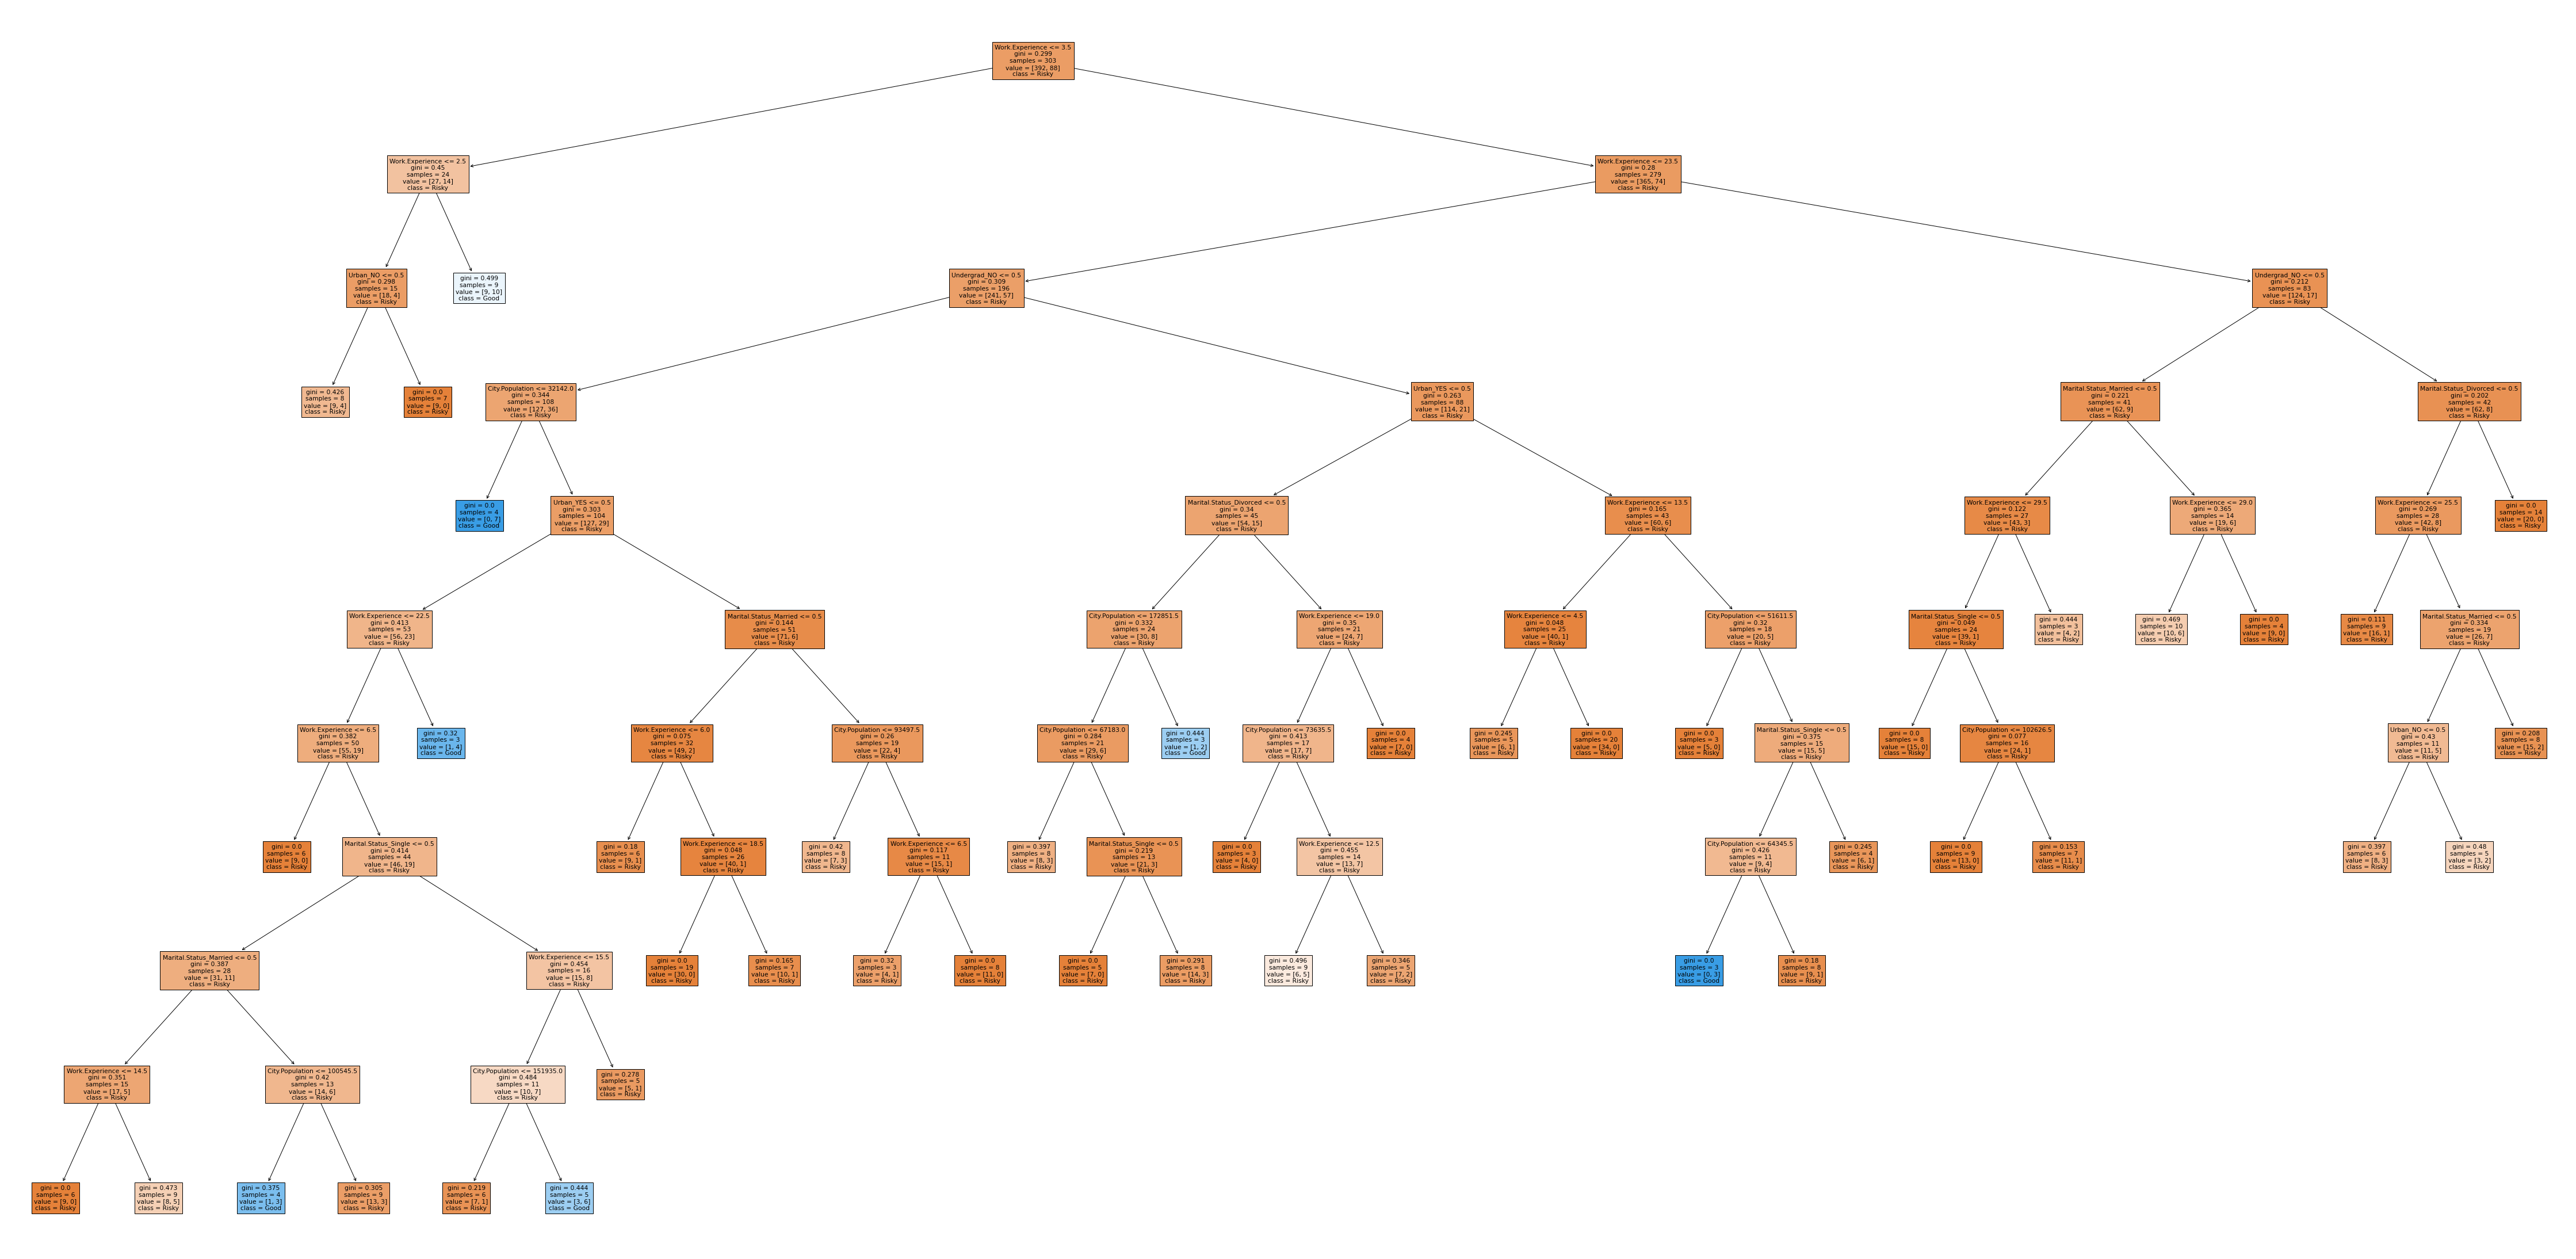

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=['Risky', "Good"],filled=True);

## GRADIENT BOOSTING CLASSIFIER

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gr_model =GradientBoostingClassifier()

In [61]:
gr_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [62]:
results = cross_val_score(gr_model, x, y, cv=kfold)
print(results.mean())

0.76


### RANDOM FOREST WITH ADABOOST AS AN ENSEMBLE TECHNIQUE GIVES HIGH ACCURACY.

## Overcoming Class Imbalance using SMOTE Techniques

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
x_smote, y_smote = smote.fit_resample(x,y)
y_smote.value_counts()
x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(x_smote,y_smote, test_size = 0.20,random_state = 7)
# rf.fit(x_train_smote,y_train_smote)
# y_pred_smote = rf.predict(x_train_smote)
# y_test_pred_smote = rf.predict(x_test_smote)
# confusion_matrix(y_test_smote, y_test_pred_smote)
# confusion_matrix(y_train_smote, y_pred_smote)
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train_smote)
x_test_scaled = preprocessing.scale(x_test_smote)

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:
rf.fit(x_train_scaled,y_train_smote)
y_pred_scaled = rf.predict(x_train_scaled)
y_test_pred_scaled = rf.predict(x_test_scaled)
confusion_matrix(y_test_smote, y_test_pred_scaled)
np.mean(y_test_smote == y_test_pred_scaled)
cls_report = pd.DataFrame(classification_report(y_test_pred_scaled, y_test_smote, output_dict=(True)))

In [66]:
cls_report

,Good,Risky,accuracy,macro avg,weighted avg
precision,0.822222,0.702970,0.759162,0.762596,0.767903
recall,0.711538,0.816092,0.759162,0.763815,0.759162
f1-score,0.762887,0.755319,0.759162,0.759103,0.759440
support,104.000000,87.000000,0.759162,191.000000,191.000000
